# Air Passengers SARIMAX

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/Users/echozhao/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load and Process the data 

In [2]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
y = pd.Series(data=df['#Passengers'].values, index=df['Month'])
y.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
dtype: int64

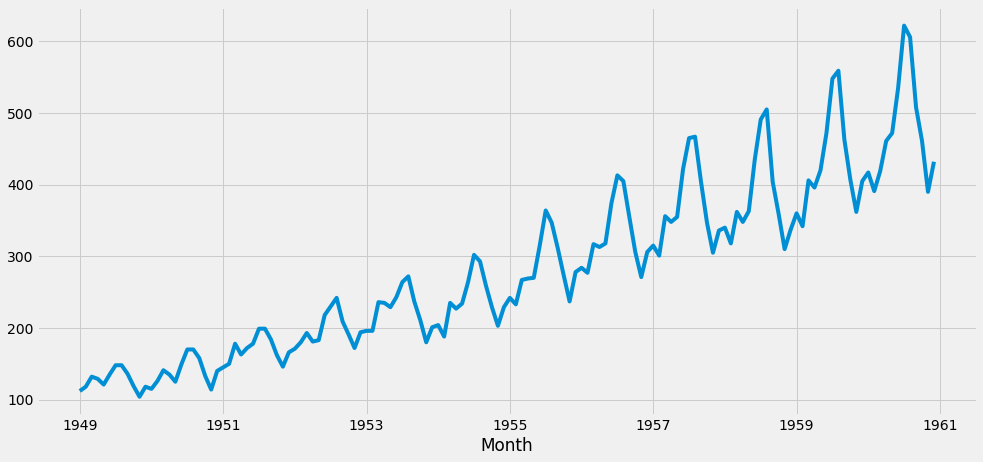

In [4]:
y.plot(figsize=(15, 7))
plt.show()

## Grid Search the p,d,q parameters

In [5]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [6]:
# specify to ignore warning messages
warnings.filterwarnings("ignore") 

# Fit Models
best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
print('\nBest Result:', best_result)

ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 1886.97854811
ARIMA(0, 0, 0) x (0, 0, 2, 12) - AIC: 1498.28618002
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 1156.29149015
ARIMA(0, 0, 0) x (0, 1, 2, 12) - AIC: 1016.13627973
ARIMA(0, 0, 0) x (0, 2, 1, 12) - AIC: 942.185608845
ARIMA(0, 0, 0) x (0, 2, 2, 12) - AIC: 834.301730346
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 1118.62591907
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 1107.25620432
ARIMA(0, 0, 0) x (1, 0, 2, 12) - AIC: 1014.6452266
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 1109.24379944
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 1033.61721667
ARIMA(0, 0, 0) x (1, 1, 2, 12) - AIC: 904.421321113
ARIMA(0, 0, 0) x (1, 2, 0, 12) - AIC: 974.439626985
ARIMA(0, 0, 0) x (1, 2, 1, 12) - AIC: 940.237089573
ARIMA(0, 0, 0) x (1, 2, 2, 12) - AIC: 835.221882834
ARIMA(0, 0, 0) x (2, 0, 0, 12) - AIC: 1024.76691323
ARIMA(0, 0, 0) x (2, 0, 1, 12) - AIC: 1020.0650786
ARIMA(0, 0, 0) x (2, 0, 2, 12) - AIC: 1013.71219663
ARIMA(0, 0, 0) x (2, 1, 0, 12) - AIC: 976.437380591
ARIMA(0, 0, 0)

ARIMA(0, 2, 0) x (0, 1, 2, 12) - AIC: 940.003278056
ARIMA(0, 2, 0) x (0, 2, 1, 12) - AIC: 959.818839235
ARIMA(0, 2, 0) x (0, 2, 2, 12) - AIC: 843.732906866
ARIMA(0, 2, 0) x (1, 0, 0, 12) - AIC: 1151.29411047
ARIMA(0, 2, 0) x (1, 0, 1, 12) - AIC: 1137.78947137
ARIMA(0, 2, 0) x (1, 0, 2, 12) - AIC: 1040.76045093
ARIMA(0, 2, 0) x (1, 1, 0, 12) - AIC: 1050.60584808
ARIMA(0, 2, 0) x (1, 1, 1, 12) - AIC: 1042.57627094
ARIMA(0, 2, 0) x (1, 1, 2, 12) - AIC: 941.896266733
ARIMA(0, 2, 0) x (1, 2, 0, 12) - AIC: 992.002801584
ARIMA(0, 2, 0) x (1, 2, 1, 12) - AIC: 959.920790637
ARIMA(0, 2, 0) x (1, 2, 2, 12) - AIC: 845.729872781
ARIMA(0, 2, 0) x (2, 0, 0, 12) - AIC: 1052.5034073
ARIMA(0, 2, 0) x (2, 0, 1, 12) - AIC: 1051.90197126
ARIMA(0, 2, 0) x (2, 0, 2, 12) - AIC: 1041.18517603
ARIMA(0, 2, 0) x (2, 1, 0, 12) - AIC: 949.484910384
ARIMA(0, 2, 0) x (2, 1, 1, 12) - AIC: 949.667272734
ARIMA(0, 2, 0) x (2, 1, 2, 12) - AIC: 943.896120761
ARIMA(0, 2, 0) x (2, 2, 0, 12) - AIC: 873.254743482
ARIMA(0, 2, 0

ARIMA(1, 1, 0) x (0, 0, 2, 12) - AIC: 1045.51480126
ARIMA(1, 1, 0) x (0, 1, 0, 12) - AIC: 1013.36804498
ARIMA(1, 1, 0) x (0, 1, 1, 12) - AIC: 928.131283731
ARIMA(1, 1, 0) x (0, 1, 2, 12) - AIC: 840.90104291
ARIMA(1, 1, 0) x (0, 2, 0, 12) - AIC: 1007.56488923
ARIMA(1, 1, 0) x (0, 2, 1, 12) - AIC: 844.14853389
ARIMA(1, 1, 0) x (0, 2, 2, 12) - AIC: 742.458733658
ARIMA(1, 1, 0) x (1, 0, 0, 12) - AIC: 1007.64964864
ARIMA(1, 1, 0) x (1, 0, 1, 12) - AIC: 995.463624945
ARIMA(1, 1, 0) x (1, 0, 2, 12) - AIC: 915.396264643
ARIMA(1, 1, 0) x (1, 1, 0, 12) - AIC: 927.590437471
ARIMA(1, 1, 0) x (1, 1, 1, 12) - AIC: 928.141862019
ARIMA(1, 1, 0) x (1, 1, 2, 12) - AIC: 842.900845365
ARIMA(1, 1, 0) x (1, 2, 0, 12) - AIC: 862.164103099
ARIMA(1, 1, 0) x (1, 2, 1, 12) - AIC: 841.289268582
ARIMA(1, 1, 0) x (1, 2, 2, 12) - AIC: 748.533153557
ARIMA(1, 1, 0) x (2, 0, 0, 12) - AIC: 912.267740931
ARIMA(1, 1, 0) x (2, 0, 1, 12) - AIC: 914.195850417
ARIMA(1, 1, 0) x (2, 0, 2, 12) - AIC: 913.7199191
ARIMA(1, 1, 0) x

ARIMA(1, 2, 2) x (2, 2, 1, 12) - AIC: 746.064506243
ARIMA(1, 2, 2) x (2, 2, 2, 12) - AIC: 750.884727115
ARIMA(2, 0, 0) x (0, 0, 0, 12) - AIC: 1394.81788899
ARIMA(2, 0, 0) x (0, 0, 1, 12) - AIC: 1201.00338044
ARIMA(2, 0, 0) x (0, 0, 2, 12) - AIC: 1058.10643498
ARIMA(2, 0, 0) x (0, 1, 0, 12) - AIC: 1013.59385472
ARIMA(2, 0, 0) x (0, 1, 1, 12) - AIC: 935.586979124
ARIMA(2, 0, 0) x (0, 1, 2, 12) - AIC: 848.399349853
ARIMA(2, 0, 0) x (0, 2, 0, 12) - AIC: 1001.03563015
ARIMA(2, 0, 0) x (0, 2, 1, 12) - AIC: 846.102718848
ARIMA(2, 0, 0) x (0, 2, 2, 12) - AIC: 747.187657695
ARIMA(2, 0, 0) x (1, 0, 0, 12) - AIC: 1001.31233734
ARIMA(2, 0, 0) x (1, 0, 1, 12) - AIC: 989.330233446
ARIMA(2, 0, 0) x (1, 0, 2, 12) - AIC: 917.291278837
ARIMA(2, 0, 0) x (1, 1, 0, 12) - AIC: 928.302192898
ARIMA(2, 0, 0) x (1, 1, 1, 12) - AIC: 934.786261324
ARIMA(2, 0, 0) x (1, 1, 2, 12) - AIC: 839.951564705
ARIMA(2, 0, 0) x (1, 2, 0, 12) - AIC: 858.097172667
ARIMA(2, 0, 0) x (1, 2, 1, 12) - AIC: 837.31380323
ARIMA(2, 0, 0

ARIMA(2, 1, 2) x (2, 1, 0, 12) - AIC: 833.920930739
ARIMA(2, 1, 2) x (2, 1, 1, 12) - AIC: 834.444955112
ARIMA(2, 1, 2) x (2, 1, 2, 12) - AIC: 829.383875008
ARIMA(2, 1, 2) x (2, 2, 0, 12) - AIC: 753.317530982
ARIMA(2, 1, 2) x (2, 2, 1, 12) - AIC: 740.285545607
ARIMA(2, 1, 2) x (2, 2, 2, 12) - AIC: 730.498203648
ARIMA(2, 2, 0) x (0, 0, 0, 12) - AIC: 1421.49958117
ARIMA(2, 2, 0) x (0, 0, 1, 12) - AIC: 1229.12693315
ARIMA(2, 2, 0) x (0, 0, 2, 12) - AIC: 1080.24752232
ARIMA(2, 2, 0) x (0, 1, 0, 12) - AIC: 1048.30946823
ARIMA(2, 2, 0) x (0, 1, 1, 12) - AIC: 964.239106941
ARIMA(2, 2, 0) x (0, 1, 2, 12) - AIC: 873.159355417
ARIMA(2, 2, 0) x (0, 2, 0, 12) - AIC: 1036.5925072
ARIMA(2, 2, 0) x (0, 2, 1, 12) - AIC: 878.859439058
ARIMA(2, 2, 0) x (0, 2, 2, 12) - AIC: 766.530274139
ARIMA(2, 2, 0) x (1, 0, 0, 12) - AIC: 1045.49397849
ARIMA(2, 2, 0) x (1, 0, 1, 12) - AIC: 1031.09303133
ARIMA(2, 2, 0) x (1, 0, 2, 12) - AIC: 953.945828926
ARIMA(2, 2, 0) x (1, 1, 0, 12) - AIC: 955.737218215
ARIMA(2, 2, 0

## Plot model diagnostics

In [7]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(best_result[0][0], best_result[0][1], best_result[0][1]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1856      0.195     -6.090      0.000      -1.567      -0.804
ar.L2         -0.4353      0.099     -4.410      0.000      -0.629      -0.242
ma.L1          0.7786      0.204      3.810      0.000       0.378       1.179
ma.S.L12      -1.4145      0.227     -6.239      0.000      -1.859      -0.970
ma.S.L24       0.4839      0.143      3.381      0.001       0.203       0.764
sigma2       118.5151     28.037      4.227      0.000      63.564     173.466


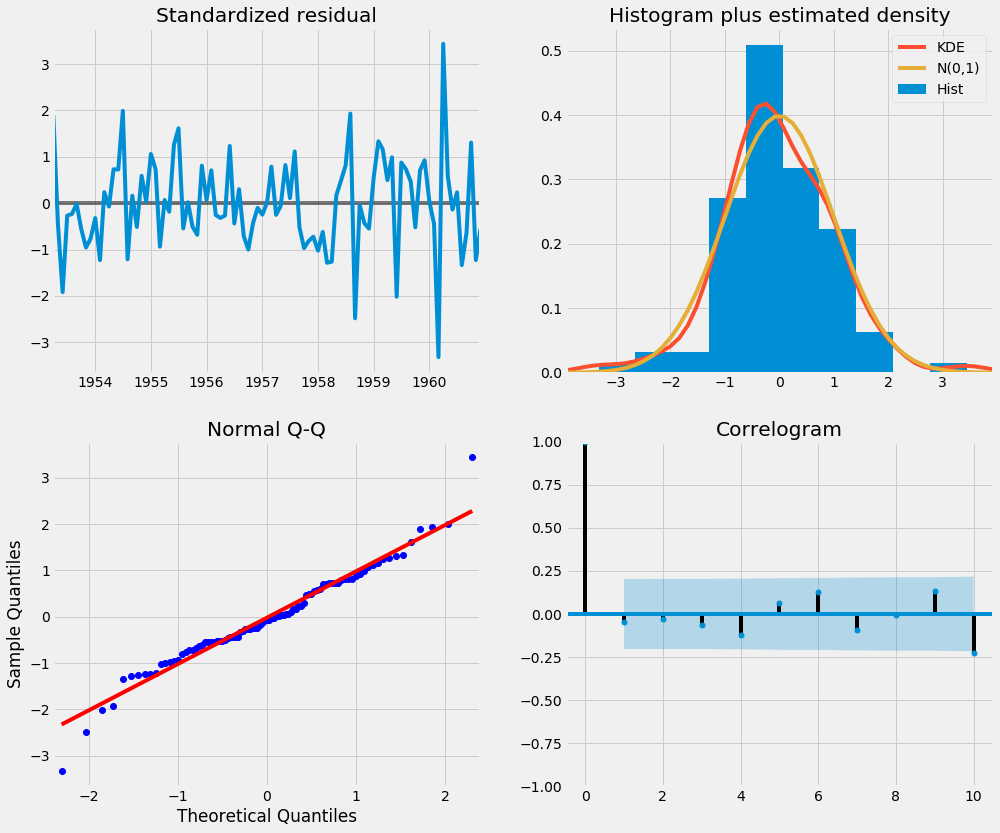

In [13]:
results.plot_diagnostics(figsize=(15, 13))
plt.show()

## Plot one step ahead forecast

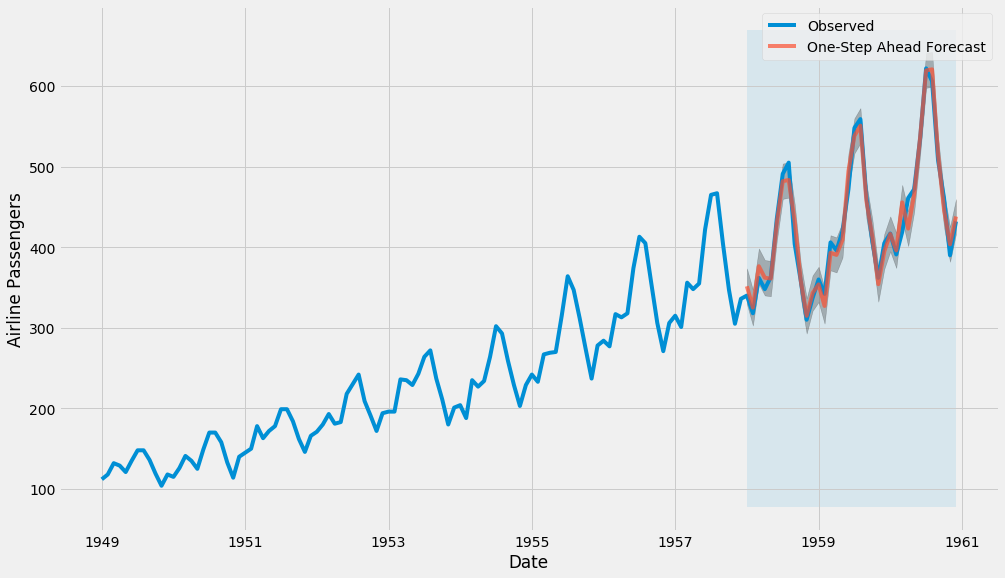

In [20]:
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = y['1949':].plot(label='Observed', figsize=(15, 9))
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [16]:
# Extract the predicted and true values of our time series
y_forecasted = pred.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 194.81


## Plot dynamic forecast

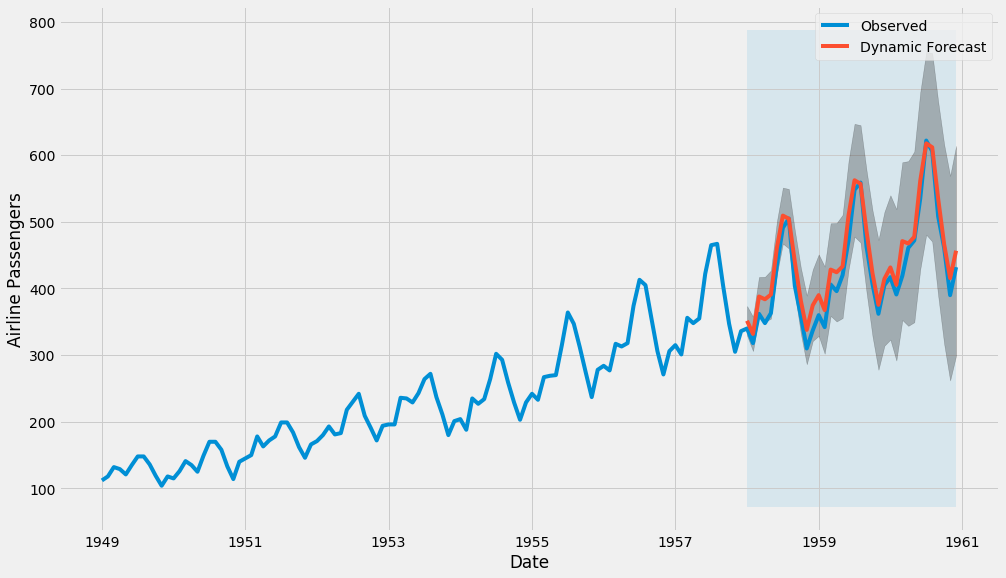

In [21]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['1949':].plot(label='Observed', figsize=(15, 9))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

In [22]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 551.54


## Plot 2-year forecast

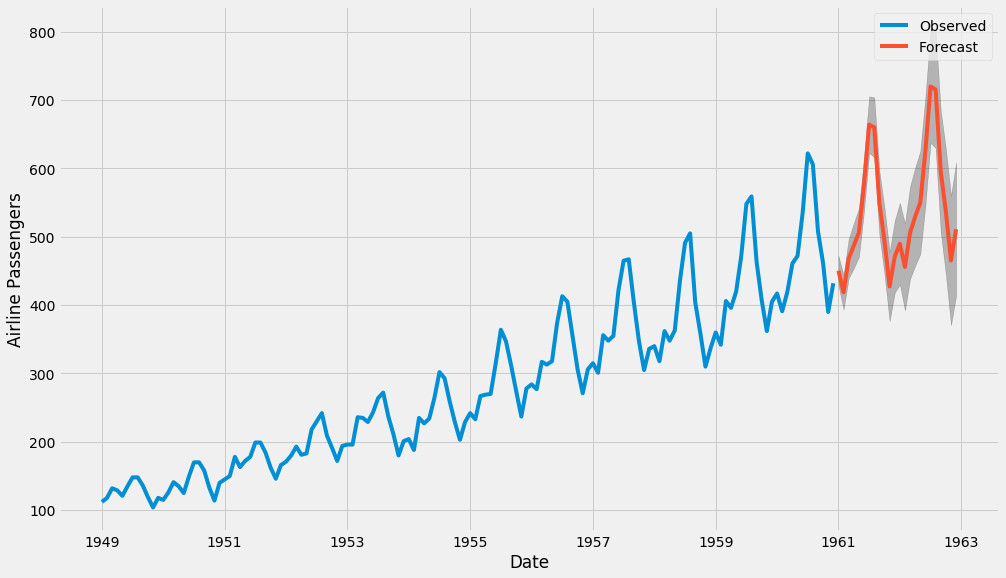

In [23]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Observed', figsize=(15, 9))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()